In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from credentials import DB_USER, USER_PASSWORD
from sqlalchemy import create_engine, text

In [2]:
db_config = {
    'host': 'localhost',
    'user': DB_USER,
    'password': USER_PASSWORD,
    'database': 'phonepe'
}

In [3]:
# Create the connection string using f-string
connection_string = f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

#### EDA

##### Data Collection and Cleaning 

1. Aggregated Data

In [4]:
query_for_agg_insu = """SELECT * FROM aggregated_insurance"""

query_for_agg_trans = """SELECT * FROM aggregated_transaction"""

query_for_agg_user = """SELECT * FROM aggregated_user"""

# creating dataframes
df_agg_insu = pd.read_sql(query_for_agg_insu,engine)
df_agg_trans = pd.read_sql(query_for_agg_trans,engine)
df_agg_user = pd.read_sql(query_for_agg_user,engine)

In [5]:
# Storing all the tables in one dict for better access
dataframes = {"Aggregated Insurance":df_agg_insu,"Aggregated Transaction":df_agg_trans,"Aggregated User":df_agg_user}

In [6]:
# displaying the first view of tables
for key,value in dataframes.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Aggregated Insurance table :
   InsuranceCount  InsuranceAmount  Year  Quarter State
0          185348       33732200.0  2020        2  None
1          354284       89495100.0  2020        3  None

Aggregated Transaction table :
            TransactionType  TransactionCount  TransactionAmount  Year  \
0  Recharge & bill payments          72550406       1.447270e+10  2018   
1     Peer-to-peer payments          46982705       1.472460e+11  2018   

   Quarter State  
0        1  None  
1        1  None  

Aggregated User table :
     Brand     Count  RegisteredUsers  Percentage  Year  Quarter State
0   Xiaomi  11926334         46877867    0.254413  2018        1  None
1  Samsung   9609401         46877867    0.204988  2018        1  None



In [7]:
# displaying rows and columns of tables
for key,value in dataframes.items():
  print(f"{key} shape is - {value.shape}")

Aggregated Insurance shape is - (701, 5)
Aggregated Transaction shape is - (5174, 6)
Aggregated User shape is - (6919, 7)


In [8]:
# displaying basic info of tables
for key,value in dataframes.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InsuranceCount   701 non-null    int64  
 1   InsuranceAmount  701 non-null    float64
 2   Year             701 non-null    int64  
 3   Quarter          701 non-null    int64  
 4   State            682 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 27.5+ KB
Aggregated Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionType    5174 non-null   object 
 1   TransactionCount   5174 non-null   int64  
 2   TransactionAmount  5174 non-null   float64
 3   Year               5174 non-null   int64  
 4   Quarter            5174 non-null   int64  
 5   State              5034 non-null   ob

In [9]:
# checking for duplicate values 
for key,value in dataframes.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Aggregated Insurance - 0
No. of duplicates in Aggregated Transaction - 0
No. of duplicates in Aggregated User - 0


In [10]:
# checking for missing values
for key,value in dataframes.items():
  print(f"{key}\n{value.isna().sum()}\n")

Aggregated Insurance
InsuranceCount      0
InsuranceAmount     0
Year                0
Quarter             0
State              19
dtype: int64

Aggregated Transaction
TransactionType        0
TransactionCount       0
TransactionAmount      0
Year                   0
Quarter                0
State                140
dtype: int64

Aggregated User
Brand                0
Count                0
RegisteredUsers      0
Percentage           0
Year                 0
Quarter              0
State              187
dtype: int64



 * Visualizing missing values using Heatmap

In [11]:
# function for plotting heatmap
def plot_heatmap(df,title):
  plt.figure(figsize=(4, 2))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title(f"{title}")
  plt.show()

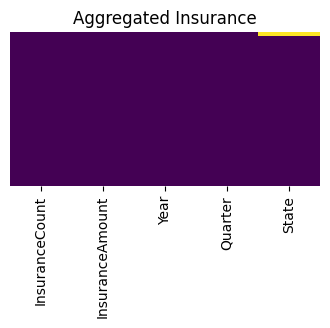

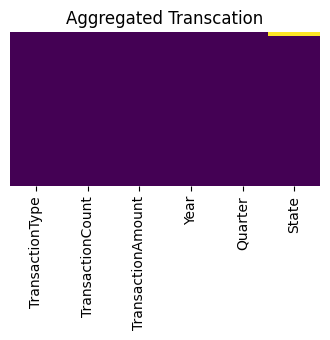

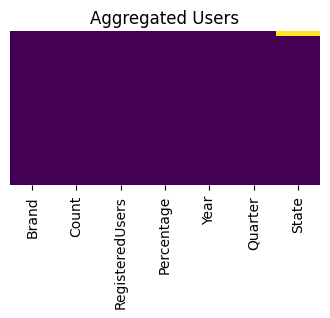

In [12]:
# heatmap for aggregated 
plot_heatmap(df_agg_insu,"Aggregated Insurance")
plot_heatmap(df_agg_trans,"Aggregated Transcation")
plot_heatmap(df_agg_user,"Aggregated Users")

Here Only [State] column has missing value which is spliting the data into country level and state level, No need to handle this missing values we just need to process this data  

In [13]:
# Displaying Unique Value w.r.t column
for key,value in dataframes.items():
  print(f"Unique values in table {key}")
  for col in value.columns:
    print(f"{col} - {value[col].nunique()}")
  print("\n")

Unique values in table Aggregated Insurance
InsuranceCount - 673
InsuranceAmount - 701
Year - 5
Quarter - 4
State - 36


Unique values in table Aggregated Transaction
TransactionType - 5
TransactionCount - 5106
TransactionAmount - 5168
Year - 7
Quarter - 4
State - 36


Unique values in table Aggregated User
Brand - 20
Count - 6688
RegisteredUsers - 629
Percentage - 6879
Year - 5
Quarter - 4
State - 36




2. Map Data

In [14]:
# query for collecting all data form SQL database
query_for_map_insu = """SELECT * FROM map_insurance_hover"""
query_for_map_trans = """SELECT * FROM map_transaction"""
query_for_map_user = """SELECT * FROM map_user"""

df_map_insu = pd.read_sql(query_for_map_insu,engine)
df_map_trans = pd.read_sql(query_for_map_trans,engine)
df_map_user = pd.read_sql(query_for_map_user,engine)

In [15]:
# Storing all the tables in one dict for better access
dataframes = {"Map Insurance":df_map_insu,"Map Transaction":df_map_trans,"Map User":df_map_user}

In [16]:
# displaying the first view of tables
for key,value in dataframes.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Map Insurance table :
         name  count  amount  Year  Quarter State
0  puducherry    112     112  2020        2  None
1  tamil nadu   5473    5473  2020        2  None

Map Transaction table :
         name    count   amount  Year  Quarter State
0  puducherry   104212   104212  2018        1  None
1  tamil nadu  6726622  6726622  2018        1  None

Map User table :
    HoverName  RegUser  Year  Quarter State
0  puducherry    49318  2018        1  None
1  tamil nadu  2104754  2018        1  None



In [17]:
# displaying rows and columns of tables
for key,value in dataframes.items():
  print(f"{key} shape is - {value.shape}")

Map Insurance shape is - (14558, 6)
Map Transaction shape is - (21612, 6)
Map User shape is - (21616, 5)


In [18]:
# displaying basic info of tables
for key,value in dataframes.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14558 entries, 0 to 14557
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     14558 non-null  object
 1   count    14558 non-null  int64 
 2   amount   14558 non-null  int64 
 3   Year     14558 non-null  int64 
 4   Quarter  14558 non-null  int64 
 5   State    13876 non-null  object
dtypes: int64(4), object(2)
memory usage: 682.5+ KB
Map Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     21612 non-null  object
 1   count    21612 non-null  int64 
 2   amount   21612 non-null  int64 
 3   Year     21612 non-null  int64 
 4   Quarter  21612 non-null  int64 
 5   State    20604 non-null  object
dtypes: int64(4), object(2)
memory usage: 1013.2+ KB
Map Transaction
None

<class 'pandas.core.frame.DataFrame'>
RangeIn

In [19]:
# checking for duplicate values 
for key,value in dataframes.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Map Insurance - 0
No. of duplicates in Map Transaction - 0
No. of duplicates in Map User - 0


In [20]:
# checking for missing values
for key,value in dataframes.items():
  print(f"{key}\n{value.isna().sum()}\n")

Map Insurance
name         0
count        0
amount       0
Year         0
Quarter      0
State      682
dtype: int64



Map Transaction
name          0
count         0
amount        0
Year          0
Quarter       0
State      1008
dtype: int64

Map User
HoverName       0
RegUser         0
Year            0
Quarter         0
State        1008
dtype: int64



* Visualization of Missing values using heatmap

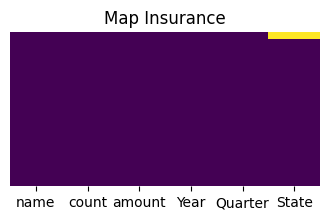

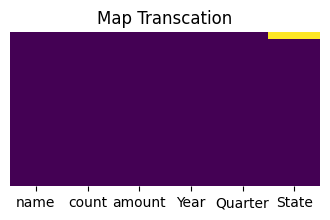

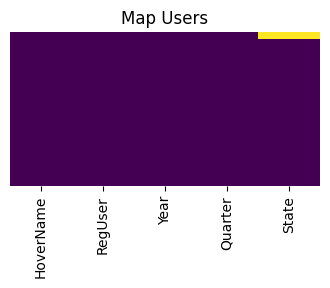

In [21]:
plot_heatmap(df_map_insu,"Map Insurance")
plot_heatmap(df_map_trans,"Map Transcation")
plot_heatmap(df_map_user,"Map Users")

3. Top Data

In [22]:
query_for_top_insu = """SELECT * FROM top_insurance"""

query_for_top_trans = """SELECT * FROM top_transaction"""

query_for_top_user = """SELECT * FROM top_user"""

# creating dataframes
df_top_insu = pd.read_sql(query_for_top_insu,engine)
df_top_trans = pd.read_sql(query_for_top_trans,engine)
df_top_user = pd.read_sql(query_for_top_user,engine)

In [23]:
# Storing all the tables in one dict for better access
dataframes = {"Top Insurance":df_top_insu,"Top Transaction":df_top_trans,"Top User":df_top_user}

In [24]:
# displaying the first view of tables
for key,value in dataframes.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Top Insurance table :
      TopState  StateCount  StateAmount  Year  Quarter State TopDistrict  \
0  maharashtra     39836.0    6879720.0  2020        2  None        None   
1    karnataka     27358.0    4794150.0  2020        2  None        None   

   DistCount  DistAmount TopPinCode  PinCount  PinAmount  
0        NaN         NaN       None       NaN        NaN  
1        NaN         NaN       None       NaN        NaN  

Top Transaction table :
        TopState  StateCount   StateAmount  Year  Quarter State TopDistrict  \
0    maharashtra  16387000.0  2.171160e+10  2018        1  None        None   
1  uttar pradesh  12537800.0  1.394000e+10  2018        1  None        None   

   DistCount  DistAmount TopPinCode  PinCount  PinAmount  
0        NaN         NaN       None       NaN        NaN  
1        NaN         NaN       None       NaN        NaN  

Top User table :
        TopState  RegUsers  Year  Quarter State TopDistrict  TopPinCode
0    maharashtra   6106994  2018        1 

In [25]:
# displaying rows and columns of tables
for key,value in dataframes.items():
  print(f"{key} shape is - {value.shape}")

Top Insurance shape is - (12846, 12)
Top Transaction shape is - (19135, 12)
Top User shape is - (19136, 7)


In [26]:
# displaying basic info of tables
for key,value in dataframes.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     190 non-null    object 
 1   StateCount   190 non-null    float64
 2   StateAmount  190 non-null    float64
 3   Year         12846 non-null  int64  
 4   Quarter      12846 non-null  int64  
 5   State        12276 non-null  object 
 6   TopDistrict  5798 non-null   object 
 7   DistCount    5798 non-null   float64
 8   DistAmount   5798 non-null   float64
 9   TopPinCode   6855 non-null   object 
 10  PinCount     6858 non-null   float64
 11  PinAmount    6858 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.2+ MB
Top Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19135 entries, 0 to 19134
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     280 non-nu

In [27]:
# checking for duplicate values 
for key,value in dataframes.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Top Insurance - 0
No. of duplicates in Top Transaction - 0
No. of duplicates in Top User - 0


In [28]:
# checking for missing values
for key,value in dataframes.items():
  print(f"{key}\n{value.isna().sum()}\n")

Top Insurance
TopState       12656
StateCount     12656
StateAmount    12656
Year               0
Quarter            0
State            570
TopDistrict     7048
DistCount       7048
DistAmount      7048
TopPinCode      5991
PinCount        5988
PinAmount       5988
dtype: int64

Top Transaction
TopState       18855
StateCount     18855
StateAmount    18855
Year               0
Quarter            0
State            840
TopDistrict    10559
DistCount      10559
DistAmount     10559
TopPinCode      8858
PinCount        8856
PinAmount       8856
dtype: int64

Top User
TopState       18856
RegUsers           0
Year               0
Quarter            0
State            840
TopDistrict    10560
TopPinCode      8856
dtype: int64



 * Visualizing missing values using Heatmap

In [29]:
# function for plotting heatmap
def plot_heatmap(df,title):
  plt.figure(figsize=(4, 2))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title(f"{title}")
  plt.show()

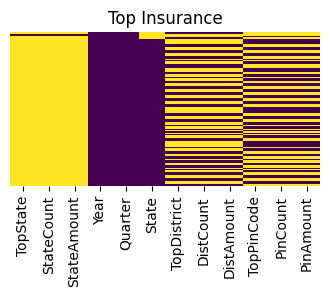

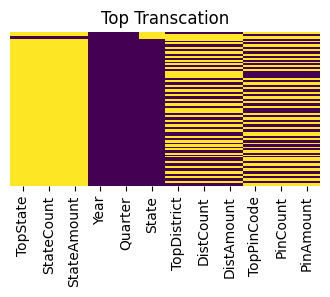

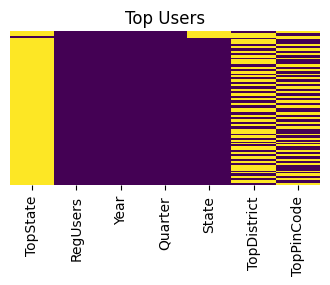

In [30]:
# heatmap for top data
plot_heatmap(df_top_insu,"Top Insurance")
plot_heatmap(df_top_trans,"Top Transcation")
plot_heatmap(df_top_user,"Top Users")

In [31]:
# Displaying Unique Value w.r.t column
for key,value in dataframes.items():
  print(f"Unique values in table {key}")
  for col in value.columns:
    print(f"{col} - {value[col].nunique()}")
  print("\n")

Unique values in table Top Insurance
TopState - 15
StateCount - 190
StateAmount - 190
Year - 5
Quarter - 4
State - 36
TopDistrict - 412
DistCount - 2755
DistAmount - 5566
TopPinCode - 899
PinCount - 1382
PinAmount - 6572


Unique values in table Top Transaction
TopState - 12
StateCount - 280
StateAmount - 280
Year - 7
Quarter - 4
State - 36
TopDistrict - 409
DistCount - 8280
DistAmount - 8286
TopPinCode - 836
PinCount - 9925
PinAmount - 9984


Unique values in table Top User
TopState - 11
RegUsers - 17843
Year - 7
Quarter - 4
State - 36
TopDistrict - 348
TopPinCode - 515




#### 1.Decoding Transaction Dynamics on PhonePe

This query helps to identify which transaction types are growing or declining in specific regions and time periods.

In [33]:
def get_transaction_data(year, quarter, level):
    if level == 'State':
        value_condition = 'IS NOT NULL'
    else:
        value_condition = 'IS NULL'

    filter_query = f"""
    SELECT 
        `TransactionType`, 
        SUM(`TotalCount`) AS `TotalCount`, 
        SUM(`TotalAmount`) AS `TotalAmount`,
        `Year`, `Quarter`
    FROM (
        SELECT 
            `TransactionType`, 
            SUM(`TransactionCount`) AS `TotalCount`, 
            SUM(`TransactionAmount`) AS `TotalAmount`, 
            `Year`, 
            `Quarter`, 
            `State`
        FROM 
            aggregated_transaction
        WHERE 
            `State` {value_condition}
        GROUP BY 
            `TransactionType`, `Year`, `Quarter`, `State`
        ORDER BY 
            `TransactionType`, `Year`, `Quarter` ASC
    ) AS trans_subquery 
    WHERE `Year` = {year} AND `Quarter` = {quarter}
    GROUP BY `TransactionType`;
    """

    df = pd.read_sql(text(filter_query), engine)

    return df

In [34]:
# parameters
year = 2021
quarter = 3
level = 'State'

transaction = get_transaction_data(year,quarter,level)
transaction

,TransactionType,TotalCount,TotalAmount,Year,Quarter
0,Financial Services,3.112140e+06,4.043310e+09,2021,3
1,Merchant payments,2.316920e+09,1.426958e+12,2021,3
2,Others,1.355842e+07,7.146799e+09,2021,3
3,Peer-to-peer payments,2.215566e+09,7.429314e+12,2021,3
4,Recharge & bill payments,7.145806e+08,3.492332e+11,2021,3


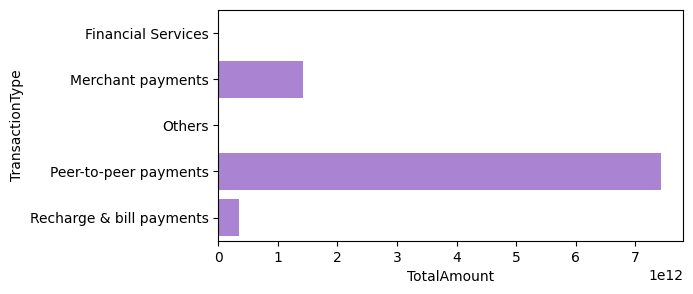

In [35]:
data = 'TotalAmount'

plt.figure(figsize=(6,3))
sns.barplot(data=transaction, x=data, y='TransactionType',color="#aa77df")
plt.show()

#### 2. Device Dominance and User Engagement Analysis

This query calculates the total app opens (or user counts per brand) and total registered users for each brand, segmented by State, Year, and Quarter. It also calculates an EngagementPercentage to highlight device brands with high registration but low engagement.

In [36]:
def get_user_data(year, quarter, level):
    if level == 'State':
        value_condition = 'IS NOT NULL'
    else:
        value_condition = 'IS NULL'

    filter_query = f"""
    SELECT 
        Brand, 
        SUM(TotalCount) AS TotalCount, 
        SUM(TotalUsers) AS TotalUsers,
        SUM(AvgPercent) AS AvgPercent,
        SUM(EngagementPercentage) AS TotalEngagementPercent, 
        Year, 
        Quarter
    FROM (
        SELECT 
            `Brand`, 
            SUM(`count`) AS `TotalCount`, 
            SUM(`RegisteredUsers`) AS `TotalUsers`,
            AVG(`Percentage`) AS `AvgPercent`, 
            `Year`, 
            `Quarter`,
            (SUM(CAST(`count` AS REAL)) * 100.0 / SUM(CAST(`RegisteredUsers` AS REAL))) AS EngagementPercentage 
        FROM aggregated_user
        WHERE `State` {value_condition}
        GROUP BY 
            `Brand`, 
            `State`,
            `Year`,
            `Quarter`
    ) AS users_subquery
    WHERE `Year` = {year} AND `Quarter` = {quarter}
    GROUP BY `Brand`, `Year`, `Quarter`
    ORDER BY `TotalCount` DESC;
    """

    # execute the query
    df = pd.read_sql(text(filter_query), engine)

    return df

users = get_user_data(year, quarter, level)
users

,Brand,TotalCount,TotalUsers,AvgPercent,TotalEngagementPercent,Year,Quarter
0,Xiaomi,80749293.0,328353856.0,9.170656,917.065582,2021,3
1,Vivo,65338266.0,328353856.0,7.004680,700.467977,2021,3
2,Samsung,61299236.0,328353856.0,6.553393,655.339303,2021,3
3,Oppo,42064633.0,328353856.0,4.566020,456.602019,2021,3
4,Realme,24185858.0,328353856.0,2.706437,270.643733,2021,3
5,Others,23684109.0,328353856.0,2.642918,264.291781,2021,3
6,Apple,8530281.0,301030666.0,0.976410,97.640996,2021,3
7,Motorola,5648189.0,328011412.0,0.510296,51.029589,2021,3
8,OnePlus,5481666.0,245420311.0,0.536928,53.692793,2021,3
9,Huawei,4937354.0,306016318.0,0.603684,60.368389,2021,3


* Bar Plot -  Total Users per Brand

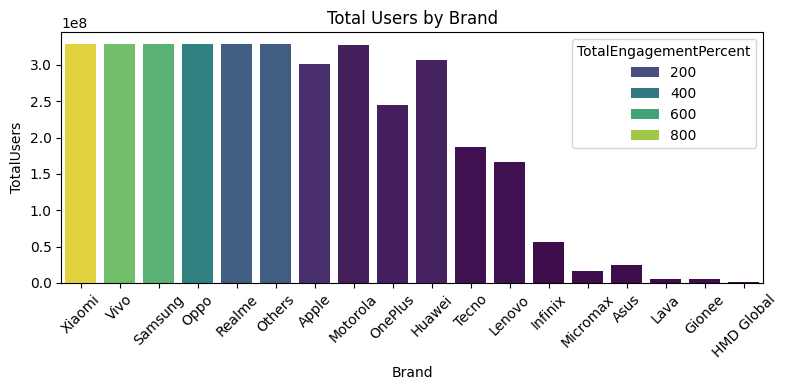

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(data=users, x='Brand', y='TotalUsers', palette='viridis', hue='TotalEngagementPercent')
plt.xticks(rotation=45)
plt.title("Total Users by Brand")
plt.tight_layout()
plt.show()

###### Line Plot - To Analyse the trend over time periods

In [38]:
# # Get unique brands for the number of lines
# unique_brands = users['Brand'].unique()
# num_lines = len(unique_brands)

# # set the yaxis value
# y_value = 'Quarter'

# # style
# sns.set_style("whitegrid")

# plt.figure(figsize=(8, 4)) 

# # Plot a line for each brand
# for brand in unique_brands:
#     brand_data = users[users['Brand'] == brand].sort_y_values(by=y_value)
#     plt.plot(brand_data[y_value], brand_data['TotalCount'], marker='o', label=brand)

# plt.xlabel(y_value, fontsize=12)
# plt.ylabel('Total Count (User Count)', fontsize=12)
# plt.title(f"Total Count of Users by Brand Over {y_value}", fontsize=14)
# plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(users[y_value].unique().astype(int))
# plt.tight_layout()
# plt.show()

#### 3. Insurance Engagement Analysis

This query aggregates insurance transaction counts and amounts at the district level within each state. It helps identify specific districts with high or low insurance engagement, guiding marketing efforts.

In [39]:
def get_insurance_count_data(year, quarter, level):

    # change the query conditions as per level specified
    if level == 'State':
        value_condition = 'IS NOT NULL'
        name = 'District'
    else: 
        value_condition = 'IS NULL'
        name = 'States' 
    
    # query to get insurance data for each state and district
    query = f""" 
    SELECT 
        `State`,
        `Year`,
        {name},
        `Quarter`,
        `TotalCount`,
        `TotalAmount`
    FROM (
        SELECT 
            `State`,
            `name` AS {name},
            `Year`,
            `Quarter`,
            SUM(`count`) AS `TotalCount`,
            SUM(`amount`) AS `TotalAmount`
        FROM map_insurance_hover
        WHERE `State` {value_condition}
        GROUP BY 
            `State`,
            `name`,
            `Year`,
            `Quarter`
    ) AS insurance_subquery 
    WHERE `Year` = {year} AND `Quarter` = {quarter}
    GROUP BY 
        `State`,
        {name},
        `Year`,
        `Quarter`
    ORDER BY
        {name},
        `State`,
        `Year`,
        `Quarter`,
        `TotalAmount` DESC;
    """

    # execute the query
    df = pd.read_sql(text(query), engine)

    # droping the State column which has null values 
    if(level == 'India'):
        df.drop(['State'], axis=1, inplace=True)

    return df

# select the data for year 2022 quarter 1 State level 
year = 2022
quarter = 1
level = 'State'

map_insurance = get_insurance_count_data(year,quarter,level)  
# filter the dataframe to get data for specific state only 
map_insurance[map_insurance['State']== 'telangana']


,State,Year,District,Quarter,TotalCount,TotalAmount
0,telangana,2022,adilabad district,1,193.0,193.0
77,telangana,2022,bhadradri kothagudem district,1,809.0,809.0
253,telangana,2022,hyderabad district,1,7434.0,7434.0
260,telangana,2022,jagtial district,1,431.0,431.0
274,telangana,2022,jangaon district,1,251.0,251.0
278,telangana,2022,jaya shankar bhalupally district,1,167.0,167.0
290,telangana,2022,jogulamba gadwal district,1,172.0,172.0
302,telangana,2022,kamareddy district,1,312.0,312.0
322,telangana,2022,karimnagar district,1,949.0,949.0
334,telangana,2022,khammam district,1,861.0,861.0


* Bar Plot - to visualize the insurance enagagemanet in each district

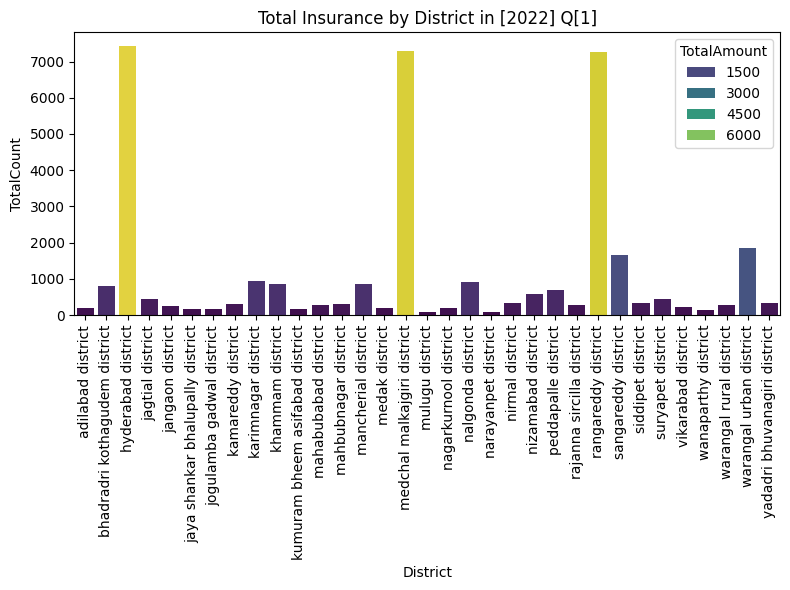

In [40]:
select_state = 'telangana'
df = map_insurance[map_insurance['State']== select_state] 

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='District', y='TotalCount', palette='viridis', hue='TotalAmount')
plt.xticks(rotation=90)
plt.title(f"Total Insurance by District in {df['Year'].unique()} Q{df['Quarter'].unique()}")
plt.tight_layout()
plt.show()

#### 4. User Engagement and Growth Strategy

This query calculates the total registered users for each district within a state, segmented by Year and Quarter. This granular view can help in understanding user engagement at a more local level for targeted growth strategies.

In [41]:
def get_regusers_data(year, quarter, level):
    # Set the condition based on level
    if level == 'State':
        value_condition = 'IS NOT NULL'
        name = 'District'
    else: 
        value_condition = 'IS NULL'
        name = 'States'

    # SQL query with corrected AND clause
    query = f"""
    SELECT
        `State`,
        `Year`,
        {name},
        `Quarter`,
        SUM(`TotalRegUser`) AS `TotalRegUser`
    FROM (
        SELECT
            `State`,
            `HoverName` AS {name},
            `Year`,
            `Quarter`,
            SUM(`RegUser`) AS `TotalRegUser`
        FROM map_user
        WHERE `State` {value_condition}
        GROUP BY
            `State`,
            `HoverName`,
            `Year`,
            `Quarter`
    ) AS users_subquery
    WHERE `Year` = {year} AND `Quarter` = {quarter}
    GROUP BY
        `State`,
        {name},
        `Year`,
        `Quarter`
    ORDER BY
        `State`,
        {name},
        `Year`,
        `Quarter` ASC
    """

    df = pd.read_sql(text(query), engine)

    # droping the State column which has null values 
    if(level == 'India'):
        df.drop(['State'], axis=1, inplace=True)
        
    return df

# Usage example
reg_users = get_regusers_data(year, quarter, level)
reg_users

,State,Year,District,Quarter,TotalRegUser
0,andaman-&-nicobar-islands,2022,nicobars district,1,2081.0
1,andaman-&-nicobar-islands,2022,north and middle andaman district,1,10720.0
2,andaman-&-nicobar-islands,2022,south andaman district,1,63487.0
3,andhra-pradesh,2022,anantapur district,1,1827094.0
4,andhra-pradesh,2022,chittoor district,1,2270705.0
...,...,...,...,...,...
727,west-bengal,2022,purba bardhaman district,1,962974.0
728,west-bengal,2022,purba medinipur district,1,1155279.0
729,west-bengal,2022,purulia district,1,535484.0
730,west-bengal,2022,south twenty four parganas district,1,1569037.0


#### 5. Insurance Penetration and Growth Potential Analysis

This query provides a summary of insurance transactions and their total value at the state level, broken down by Year and Quarter. This can help in identifying regions and periods of high or low insurance adoption.

In [42]:
# analyzing the insurance data 
def get_insurance_data(year, quarter, level):
    if level == 'State':
        value_condition = 'IS NOT NULL'
    else:
        value_condition = 'IS NULL'

    # Build the dynamic WHERE clause
    where_parts = [f"`State` {value_condition}"]
    
    # Initialize parameters dictionary for SQLAlchemy bind parameters
    params = {}

    # Add Year and Quarter conditions only if they are not 'All'
    if year != 'All':
        where_parts.append("`Year` = :year_param")
        params['year_param'] = year
    if quarter != 'All':
        where_parts.append("`Quarter` = :quarter_param")
        params['quarter_param'] = quarter

    full_where_clause = "WHERE " + " AND ".join(where_parts)

    # Define columns for SELECT, GROUP BY, and ORDER BY
    # This directly queries `aggregated_insurance` without a redundant subquery

    # Columns for selection (aggregated)
    select_columns = [
        "`State`",
        "`Year`",
        "`Quarter`",
        "SUM(`InsuranceCount`) AS `TotalCount`",
        "SUM(`InsuranceAmount`) AS `TotalAmount`"
    ]
    
    # Columns for GROUP BY
    group_by_columns = [
        "`State`",
        "`Year`",
        "`Quarter`"
    ]

    # Columns for ORDER BY
    order_by_columns = [
        "`State`",
        "`Year`",
        "`Quarter` ASC" # Ensure ASC is correctly applied to Quarter
    ]

    # Construct the final SQL query string
    query = f"""
    SELECT
        {', '.join(select_columns)}
    FROM aggregated_insurance
    {full_where_clause}
    GROUP BY
        {', '.join(group_by_columns)}
    ORDER BY
        {', '.join(order_by_columns)};
    """

    # Execute the query using pandas.read_sql with text() and parameters
    df = pd.read_sql(text(query), engine, params=params)

    return df


year_val = 2021
quarter_val = 1
level_val_state = 'State'
level_val_all = 'All' 
level_val_india = 'India' 

print(f"Data for Year={year_val}, Quarter={quarter_val}, Level='{level_val_state}'")
insurance_state = get_insurance_data(year_val, quarter_val, level_val_state)
insurance_state

Data for Year=2021, Quarter=1, Level='State'


,State,Year,Quarter,TotalCount,TotalAmount
0,andaman-&-nicobar-islands,2021,1,225.0,244266.0
1,andhra-pradesh,2021,1,22105.0,12749874.0
2,arunachal-pradesh,2021,1,194.0,131611.0
3,assam,2021,1,3167.0,2334419.0
4,bihar,2021,1,12554.0,8796619.0
5,chandigarh,2021,1,338.0,238576.0
6,chhattisgarh,2021,1,4712.0,2620468.0
7,dadra-&-nagar-haveli-&-daman-&-diu,2021,1,467.0,285691.0
8,delhi,2021,1,12822.0,9655261.0
9,goa,2021,1,879.0,827384.0


In [43]:
print(f" Data for Year={year_val}, Quarter={quarter_val}, Level='{level_val_india}'")
insurance_india = get_insurance_data(year_val, quarter_val, level_val_india)
insurance_india

 Data for Year=2021, Quarter=1, Level='India'


,State,Year,Quarter,TotalCount,TotalAmount
0,None,2021,1,318119.0,206307024.0


In [44]:

print(f"Data for All Quarters, Year={year_val}, Level='{level_val_state}'")
insurance_all_q = get_insurance_data(year_val, 'All', level_val_state)
insurance_all_q


Data for All Quarters, Year=2021, Level='State'


,State,Year,Quarter,TotalCount,TotalAmount
0,andaman-&-nicobar-islands,2021,1,225.0,244266.0
1,andaman-&-nicobar-islands,2021,2,137.0,181504.0
2,andaman-&-nicobar-islands,2021,3,230.0,305235.0
3,andaman-&-nicobar-islands,2021,4,757.0,1056380.0
4,andhra-pradesh,2021,1,22105.0,12749874.0
...,...,...,...,...,...
139,uttarakhand,2021,4,5529.0,7849020.0
140,west-bengal,2021,1,15488.0,11172042.0
141,west-bengal,2021,2,15200.0,12396029.0
142,west-bengal,2021,3,24839.0,21424336.0


In [45]:
print(f"Data for All Years, All Quarters, Level='{level_val_state}'")
insurance_all_all = get_insurance_data('All', 'All', level_val_state)
insurance_all_all

Data for All Years, All Quarters, Level='State'


,State,Year,Quarter,TotalCount,TotalAmount
0,andaman-&-nicobar-islands,2020,2,6.0,1360.0
1,andaman-&-nicobar-islands,2020,3,41.0,15380.0
2,andaman-&-nicobar-islands,2020,4,124.0,157975.0
3,andaman-&-nicobar-islands,2021,1,225.0,244266.0
4,andaman-&-nicobar-islands,2021,2,137.0,181504.0
...,...,...,...,...,...
677,west-bengal,2023,4,72712.0,100365560.0
678,west-bengal,2024,1,79576.0,104987912.0
679,west-bengal,2024,2,67048.0,89476632.0
680,west-bengal,2024,3,77158.0,107451768.0
